In [4]:
from pathlib import Path
import json
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw

In [5]:
# /data/datasets/LaSOT
# /data/datasets/LaSOT/training_set.txt
# /data/datasets/LaSOT/testing_set.txt
# read txt file
p_lasot = Path("/data/datasets/LaSOT")
with open("/data/datasets/LaSOT/training_set.txt", 'r') as f:
    trains = f.readlines()
    
with open("/data/datasets/LaSOT/testing_set.txt", 'r') as f:
    tests = f.readlines()
    
for idx in range(len(trains)):
    trains[idx] = trains[idx].strip()
    
for idx in range(len(tests)):
    tests[idx] = tests[idx].strip()

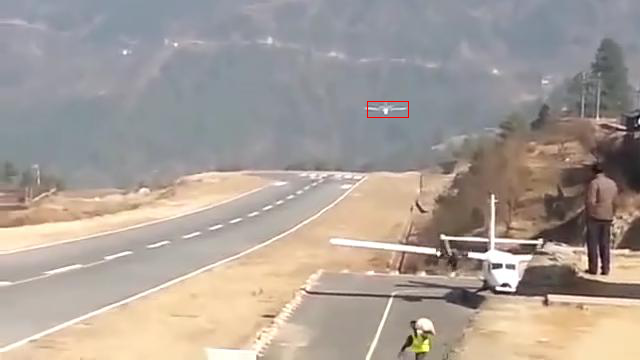

(640, 360)

In [6]:
img = Image.open("/data/datasets/LaSOT/airplane/airplane-1/img/00000001.jpg")  
draw = ImageDraw.Draw(img)
draw.rectangle([367, 101, 408, 117], outline='red')
display(img)
#[367., 101.,  41.,  16.]
img.size

In [11]:
fps = 30
flat_anns = []
for test in tests:
    
    clip_uid = test # airplane-1
    video_uid = clip_uid.split('-')[0] # airplane
    qset_id = clip_uid.split('-')[1] # 1
    p_clip = p_lasot / video_uid / clip_uid / 'img'
    p_ann = p_lasot / video_uid / clip_uid / 'groundtruth.txt'
    imgs = list(p_clip.glob('*.jpg'))
    
    with open(p_ann, 'r') as f:
        anns = f.readlines()
        
    img = Image.open(imgs[0])
    ow, oh = img.size
    
    assert len(anns) == len(imgs)
    
    rts = []
    for idx, ann in enumerate(anns):
        x1, y1, w, h = ann.strip().split(',')
        x1, y1, w, h = int(x1), int(y1), int(w), int(h)
        rt = {
            'fno': idx,
            'x1': x1,
            'y1': y1,
            'w': w,
            'h': h,
        }
        
        rts.append(rt)
        
    sample = {
            'video_uid': video_uid,
            'clip_uid': clip_uid,
            'annotation_uid': clip_uid,
            'query_set': qset_id,
            'clip_fps': fps,
            'clip_duration': len(rts) / fps,
            'original_width': ow,
            'original_height': oh,
            'query_frame': len(anns),
            'object_title': video_uid,
            'visual_crop': rts[0]}
    
    sample['response_track_valid_range'] = [rts[0]['fno'], rts[-1]['fno']]
    sample['response_track'] = rts
    
    flat_anns.append(sample)
    
# save json
with open('/data/soyeonhong/vq2d/vq2d-lightning/data/LaSOT_test.json', 'w') as f:
    json.dump(flat_anns, f)

In [2]:
import os
import re

# Directory where your images are stored
directory = "/data/datasets/LaSOT/airplane/airplane-1/img"

# Regex pattern to extract numbers from filenames like 00001.jpg
pattern = re.compile(r"(\d+)\.jpg")

# List to store valid numbers
valid_numbers = []

# Iterate over files in the directory
for filename in os.listdir(directory):
    match = pattern.match(filename)
    if match:
        number = match.group(1).lstrip('0')  # Remove leading zeros
        valid_numbers.append(int(number))

print(sorted(valid_numbers))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22